In [2]:
import pandas as pd
summ = pd.read_csv('summary_table_v1.4.csv')
raw = pd.read_csv('drugcomb_data_v1.4.csv')

block_to_study = raw[['block_id', 'study_name']].drop_duplicates()
summ = summ.merge(block_to_study, on='block_id')

mono = summ[summ['drug_col'].isna()]
comb = summ[~summ['drug_col'].isna()]

/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jarridr/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
k562_combs = comb[comb['cell_line_name'] == 'K-562']

In [4]:
sorted(comb['cell_line_name'].unique())

['786-0',
 'A-673',
 'A2058',
 'A2780',
 'A375',
 'A427',
 'A498',
 'A549',
 'ACHN',
 'BT-549',
 'CAKI-1',
 'CAOV3',
 'CCRF-CEM',
 'COLO 205',
 'COLO320DM',
 'DIPG25',
 'DLD1',
 'DU-145',
 'ED-40515',
 'EFM192B',
 'EKVX',
 'ES2',
 'EW-8',
 'HCC-2998',
 'HCT-15',
 'HCT116',
 'HDLM-2',
 'HL-60(TB)',
 'HOP-62',
 'HOP-92',
 'HS 578T',
 'HT144',
 'HT29',
 'IGROV1',
 'JHH-136',
 'JHH-520',
 'K-562',
 'KB-3-1',
 'KB-ChR-8-5-11',
 'KBM-7',
 'KM12',
 'KPL1',
 'L-1236',
 'L-428',
 'LNCAP',
 'LOVO',
 'LOX IMVI',
 'M14',
 'MALME-3M',
 'MCF7',
 'MDA-MB-231',
 'MDA-MB-435',
 'MDA-MB-468',
 'MDAMB436',
 'MOLT-4',
 'MSTO',
 'NCI-H226',
 'NCI-H322M',
 'NCI-H460',
 'NCI-H522',
 'NCI/ADR-RES',
 'NCIH1650',
 'NCIH2122',
 'NCIH23',
 'NCIH520',
 'OCUBM',
 'OV90',
 'OVCAR-4',
 'OVCAR-5',
 'OVCAR-8',
 'OVCAR3',
 'PA1',
 'PANC-1',
 'PC-3',
 'RD',
 'RKO',
 'RPMI-8226',
 'RPMI7951',
 'RXF 393',
 'Rh36',
 'SF-268',
 'SF-295',
 'SF-539',
 'SK-MEL-2',
 'SK-MEL-28',
 'SK-MEL-5',
 'SK-OV-3',
 'SKMEL30',
 'SKMES1',
 '

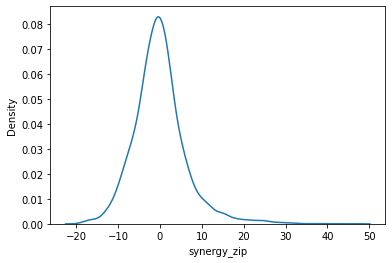

In [5]:
import seaborn as sns
sns.kdeplot(k562_combs['synergy_zip'])

In [6]:
k562_combs.sort_values('synergy_zip', ascending=False)

,block_id,drug_row,drug_col,cell_line_name,conc_r_unit,conc_c_unit,css,synergy_zip,synergy_bliss,synergy_loewe,synergy_hsa,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,S,study_name
359469,359470,VEMURAFENIB,ACTINOMYCIN D,K-562,uM,uM,49.2070,46.651338,48.588434,45.684103,46.429091,5.000000,0.000434,-3.748,2.869,35.720,62.694,50.0860,ALMANAC
292856,292857,TAMOXIFEN CITRATE,DOCETAXEL,K-562,uM,uM,54.3540,42.203082,46.330003,34.592686,36.192835,3.561148,0.040000,-7.126,-4.267,78.117,30.591,65.7470,ALMANAC
144981,144982,HYDROXYUREA,MITOTANE,K-562,uM,uM,-34.3190,39.240576,45.083849,-11.717767,-3.814443,0.087651,20.000000,-37.629,-31.628,-36.326,-32.312,34.9380,ALMANAC
357056,357057,VEMURAFENIB,PLICAMYCIN,K-562,uM,uM,34.0090,37.133993,36.648964,36.804329,34.432050,5.000000,0.003946,-3.748,1.770,22.269,45.749,35.9870,ALMANAC
206631,206632,TAMOXIFEN CITRATE,DASATINIB,K-562,uM,uM,81.9605,35.603178,37.082890,-7.412460,31.917637,0.550580,0.032744,-8.275,38.395,96.670,67.251,51.8405,ALMANAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199805,199806,GEMZAR (LILLY),AZACYTIDINE,K-562,uM,uM,23.9390,-17.793915,-14.317610,-12.494781,-10.616921,0.001698,0.464533,14.936,33.435,24.863,23.015,-24.4320,ALMANAC
370448,370449,URACIL MUSTARD,PRALATREXATE,K-562,uM,uM,35.5375,-18.049645,-20.436457,-17.982224,-17.519589,34.362935,0.000316,21.675,11.883,23.349,47.726,1.9795,ALMANAC
183069,183070,THALIDOMIDE,AMIFOSTINE,K-562,uM,uM,-16.9065,-18.237444,-37.884880,-53.733561,-49.024586,4.611129,3.261646,-29.346,38.222,-23.126,-10.687,-25.7825,ALMANAC
394477,394478,CABAZITAXEL,ARSENIC TRIOXIDE,K-562,uM,uM,8.4445,-18.724116,-30.334242,-48.365388,-30.368351,0.003376,0.227192,52.685,-0.282,17.504,-0.615,-43.9585,ALMANAC


In [1]:
k562_combs

NameError: name 'k562_combs' is not defined

In [7]:
d_row, d_col = k562_combs.sort_values('synergy_zip', ascending=False).iloc[2][['drug_row', 'drug_col']]

In [19]:
all_for_comb = comb[((comb['drug_row'] == d_row) & (comb['drug_col'] == d_col)) | ((comb['drug_row'] == d_col) & (comb['drug_col'] == d_row))]

In [20]:
all_for_comb

,block_id,drug_row,drug_col,cell_line_name,conc_r_unit,conc_c_unit,css,synergy_zip,synergy_bliss,synergy_loewe,synergy_hsa,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,S,study_name
129099,129100,MITOTANE,HYDROXYUREA,KBM-7,uM,uM,92.691595,-6.266808,-6.266808,-3.251629,-3.247569,0.000079,2.549510e-04,74.350184,95.939164,92.691595,92.691595,-77.597753,CLOUD
133619,133620,HYDROXYUREA,MITOTANE,SNB-75,uM,uM,-12.543000,12.671785,14.783947,-2.375191,-1.311910,20.000000,1.161630e-07,-12.610000,-11.827000,-11.899000,-13.187000,11.894000,ALMANAC
135907,135908,HYDROXYUREA,MITOTANE,CCRF-CEM,uM,uM,-19.489500,26.540638,43.051123,-11.123461,-1.252794,17.604420,2.000000e+01,-30.273000,-33.166000,-28.831000,-10.148000,43.949500,ALMANAC
136751,136752,HYDROXYUREA,MITOTANE,SK-MEL-2,uM,uM,-10.970500,11.662645,13.357626,-3.403613,-5.077497,2.562770,2.000000e+01,-12.201000,-10.969000,-14.009000,-7.932000,12.199500,ALMANAC
140817,140818,HYDROXYUREA,MITOTANE,MCF7,uM,uM,-8.330500,5.412062,6.147434,-5.522035,-4.014633,3.602621,2.000000e+01,-6.166000,-8.347000,-8.864000,-7.797000,6.182500,ALMANAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276204,276205,HYDROXYUREA,MITOTANE,KM12,uM,uM,-10.218000,10.572799,11.823594,-7.374983,-5.257930,20.000000,2.000000e+01,-10.707000,-15.998000,-12.578000,-7.858000,16.487000,ALMANAC
279719,279720,HYDROXYUREA,MITOTANE,DU-145,uM,uM,-22.542500,26.975882,26.972917,2.236631,-2.292489,0.106757,4.554740e-01,-24.484000,-20.670000,-23.086000,-21.999000,22.611500,ALMANAC
281510,281511,HYDROXYUREA,MITOTANE,MDA-MB-231,uM,uM,-4.517000,5.968739,9.883256,-3.427601,-1.406054,9.344931,2.000000e+01,-8.996000,-6.910000,-8.713000,-0.321000,11.389000,ALMANAC
288463,288464,HYDROXYUREA,MITOTANE,OVCAR-4,uM,uM,-9.567500,5.570318,3.475327,-4.755886,-3.801304,0.164447,2.000000e+01,-6.856000,-5.826000,-10.703000,-8.432000,3.114500,ALMANAC


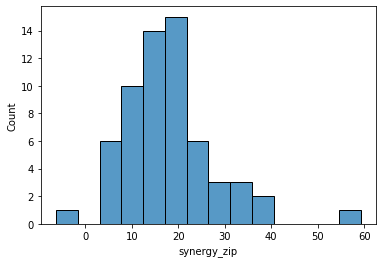

In [23]:
sns.histplot(all_for_comb['synergy_zip'])

In [5]:
def get_uniq_combs(df, study_name=''):
    cell_lines = df['cell_line_name'].to_frame().reset_index().drop(columns=['index']).drop_duplicates()
    if study_name != '':
        df = df[df['study_name'] == study_name]
    
    for_uniq_count = df[['cell_line_name', 'drug_col', 'drug_row']]
    for_uniq_count = for_uniq_count.append(df[['cell_line_name', 'drug_row', 'drug_col']])
    for_uniq_count = for_uniq_count.drop_duplicates()
    
    gb_df = for_uniq_count.groupby('cell_line_name')[['drug_row', 'drug_col']].size().reset_index()
    gb_df = gb_df.rename(columns={0: 'unique_combs_%s' % study_name})
    
    
    zero_val_cell_lines = pd.DataFrame()
    zero_val_cell_lines['cell_line_name'] = cell_lines[~cell_lines['cell_line_name'].isin(gb_df['cell_line_name'])]['cell_line_name']
    zero_val_cell_lines['unique_combs_%s' % study_name] = 0
    
    return gb_df.append(zero_val_cell_lines)

get_uniq_combs(k562_combs, 'ALMANAC')


,cell_line_name,unique_combs_ALMANAC
0,K-562,5172


In [1]:
maybe = pd.read_csv('~/repos/LambdaZero/DrugComb/raw/drugcomb_data_v1.4.csv')

NameError: name 'pd' is not defined